In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv("Ecommerce Customers")

In [59]:
customers.head(4)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344



    Avg. Session Length: Average session of in-store style advice sessions.
    Time on App: Average time spent on App in minutes
    Time on Website: Average time spent on Website in minutes
    Length of Membership: How many years the customer has been a member.


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [19]:
sns.set_palette("GnBu_d")

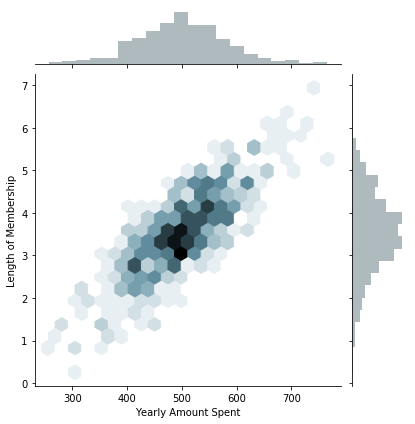

In [20]:
# the yearly amount spent seems to be highly correlated to the length of Membership
sns.jointplot(x='Yearly Amount Spent',y='Length of Membership',kind='hex',data=customers)

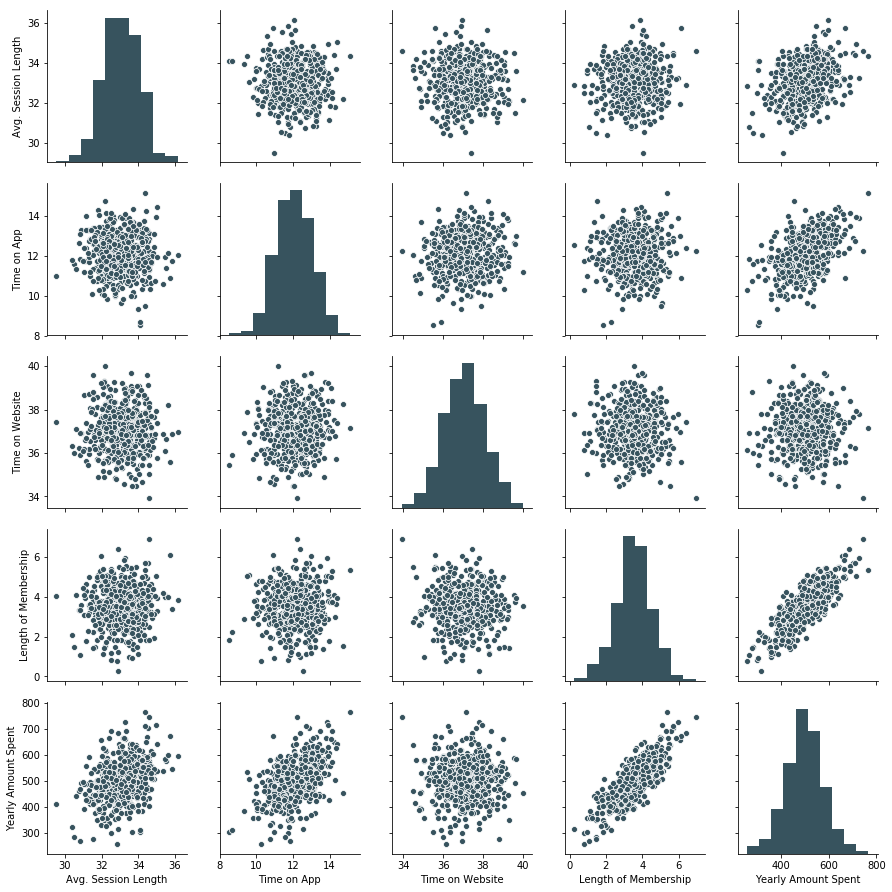

In [21]:
# checking the relationships across the entire dataset
# it seems Yearly amount spent/ Length of membership and Time on app/early amount spent have higher correlation coefficient
sns.pairplot(customers)

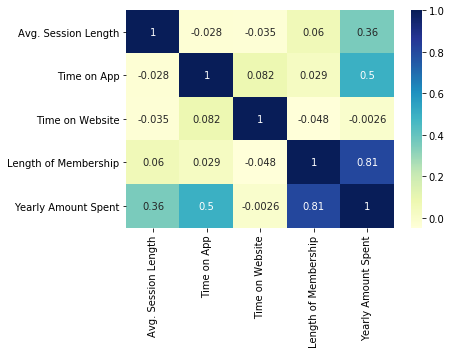

In [22]:
# let's check it with correlation matrxi
sns.heatmap(customers.corr(),cmap="YlGnBu",annot=True)

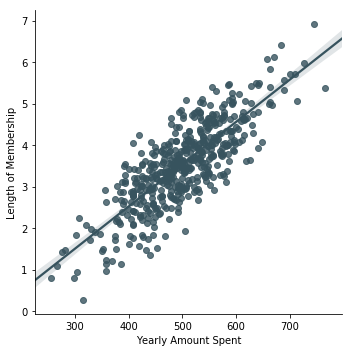

In [26]:
# let's create linear model plot ..
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

In [27]:
X = customers[['Length of Membership','Time on Website','Avg. Session Length','Time on App']]

In [28]:
y = customers['Yearly Amount Spent']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
var = LinearRegression()

In [34]:
var.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
X.columns

Index(['Length of Membership', 'Time on Website', 'Avg. Session Length',
       'Time on App'],
      dtype='object')

In [49]:
# it seems the most effective way to increase the yearly money spent to keep the length of the user's membership
# as long as possible and try to increase the time spent by the user on the APP (increase the performance of the APP,
# offer more services..?)  
coef_cal = pd.DataFrame(var.coef_,X.columns,columns=["Coefficients"])
print(coef_cal)

                      Coefficients
Length of Membership     61.279097
Time on Website           0.190405
Avg. Session Length      25.981550
Time on App              38.590159


In [52]:
predictions = var.predict(X_test)

Text(0, 0.5, 'Predicted Y')

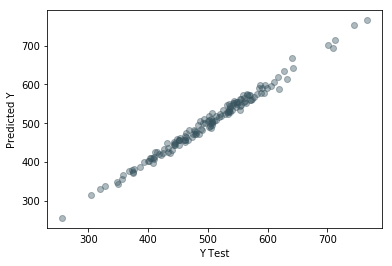

In [56]:
# let's build a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions, alpha=0.4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [57]:
# calculating the variance score
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8.933815066978642


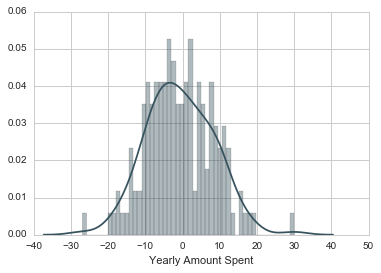

In [317]:
# let's check the residuals .. values are randomly dispersed around zero..the model seems to be working..
sns.distplot((y_test-predictions),bins=50);